In [4]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [5]:
iris=load_iris()
x=iris.data
y=iris.target

In [6]:
knn=KNeighborsClassifier(n_neighbors=5)
score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print(score)
print('\n\nscoremean',score.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


scoremean 0.9666666666666668


In [7]:
K_range=range(1,31)
k_scores=[]
for k in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
        
print(k_scores)        

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


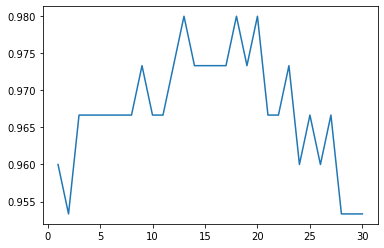

In [8]:
plt.plot(K_range,k_scores)

In [9]:
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV

In [10]:
k_range=range(1,31)
param_grid=dict(n_neighbors=k_range)
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')

In [11]:
grid.fit(x,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 31)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [12]:
grid.cv_results_

{'mean_fit_time': array([0.00049801, 0.        , 0.00049882, 0.00049868, 0.00049872,
        0.00039897, 0.00059843, 0.00049877, 0.00019946, 0.00039904,
        0.00019941, 0.00050185, 0.        , 0.00020235, 0.00029929,
        0.00029888, 0.0001966 , 0.00030165, 0.0003988 , 0.00029886,
        0.00049839, 0.00039897, 0.00040035, 0.00019941, 0.00060709,
        0.00040305, 0.00059724, 0.00039523, 0.000299  , 0.0004987 ]),
 'std_fit_time': array([0.00049801, 0.        , 0.00049882, 0.00049868, 0.00049872,
        0.00048864, 0.00048862, 0.00049877, 0.00039892, 0.00048872,
        0.00039883, 0.00050192, 0.        , 0.00040474, 0.00045717,
        0.00045655, 0.00039326, 0.00046081, 0.00048843, 0.00045651,
        0.00049839, 0.00048864, 0.00049036, 0.00039883, 0.00049579,
        0.0004937 , 0.00048765, 0.00048412, 0.00045673, 0.0004987 ]),
 'mean_score_time': array([0.00089822, 0.00100014, 0.00099716, 0.00059528, 0.00079787,
        0.00059836, 0.00089762, 0.00099723, 0.00099723, 0.00

In [13]:
k_range=range(1,31)
weight_options=['uniform','distance']
param_grid=dict(n_neighbors=k_range,weights=weight_options)
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(x,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [14]:
grid.cv_results_

{'mean_fit_time': array([5.98621368e-04, 3.94773483e-04, 3.00121307e-04, 5.99646568e-04,
        3.98898125e-04, 1.99508667e-04, 3.98850441e-04, 2.98380852e-04,
        1.99413300e-04, 2.99310684e-04, 3.98921967e-04, 2.99167633e-04,
        4.98604774e-04, 3.98921967e-04, 1.99460983e-04, 1.99532509e-04,
        9.98020172e-05, 3.98945808e-04, 3.98826599e-04, 2.99167633e-04,
        3.98826599e-04, 2.99215317e-04, 4.00781631e-04, 4.01663780e-04,
        3.99136543e-04, 2.99215317e-04, 3.98945808e-04, 3.98898125e-04,
        4.00185585e-04, 2.01702118e-04, 2.98786163e-04, 3.99255753e-04,
        4.00614738e-04, 3.96633148e-04, 3.98921967e-04, 2.99239159e-04,
        3.94272804e-04, 3.98850441e-04, 2.01606750e-04, 2.99048424e-04,
        2.01749802e-04, 3.98993492e-04, 4.98604774e-04, 6.96802139e-04,
        2.99739838e-04, 3.98373604e-04, 6.99090958e-04, 6.98208809e-04,
        2.99048424e-04, 4.98557091e-04, 9.95397568e-05, 3.98921967e-04,
        3.98945808e-04, 3.97038460e-04, 2.99215

In [15]:
grid.best_score_

0.98

In [16]:
grid.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [18]:
from sklearn.model_selection import RandomizedSearchCV 
from random import randint
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]}   

In [ ]:
k_range=range(1,31)
weight_options=['uniform','distance']
param_grid=dict(n_neighbors=k_range,weights=weight_options)
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(x,y)

In [21]:
tree_cv = RandomizedSearchCV(knn, param_grid, cv = 5) 
  
tree_cv.fit(x, y) 

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=30,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [22]:
tree_cv.cv_results_

{'mean_fit_time': array([0.00079765, 0.00061116, 0.00019932, 0.00039325, 0.000597  ,
        0.00019965, 0.        , 0.        , 0.00039902, 0.        ]),
 'std_fit_time': array([0.00039883, 0.00049905, 0.00039864, 0.00048171, 0.00048745,
        0.0003993 , 0.        , 0.        , 0.00048869, 0.        ]),
 'mean_score_time': array([0.00159583, 0.00079098, 0.00080252, 0.00079918, 0.00059881,
        0.00140209, 0.00198903, 0.00179539, 0.00100222, 0.00179572]),
 'std_score_time': array([7.97677074e-04, 3.95640460e-04, 4.01419295e-04, 3.99599212e-04,
        4.88928314e-04, 4.83656317e-04, 1.14008963e-05, 3.99586028e-04,
        1.11712271e-05, 3.98019446e-04]),
 'param_weights': masked_array(data=['uniform', 'distance', 'distance', 'distance',
                    'distance', 'uniform', 'uniform', 'uniform', 'uniform',
                    'uniform'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
   

In [23]:
tree_cv.best_score_

0.9866666666666667